In [1]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


In [2]:
def load_nn(tspec): 
    magic_line="4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_{}_{}_{}.npy".format(
    tspec['trainig_day'],tspec['training_validation_length'],tspec['validation_split'])
    fn = 'npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line
    print(fn)
    y_pred_nn = np.load(fn)
    return y_pred_nn

In [4]:
tspec=dict()
tspec['trainig_day']=375
tspec['training_validation_length']=365
tspec['validation_split']=0.7
magic_line="4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_{}_{}_{}.npy".format(
    tspec['trainig_day'],tspec['training_validation_length'],tspec['validation_split'])

varn='t'
y = np.load('npys/y_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
ts = np.arange(y.shape[0])/4



In [12]:
#compute y linear
trainig_day=375
min_day=10
start_day=max(min_day,trainig_day-(365+45))
end_day=start_day+90

y_pred_linear = np.empty(y.shape)
for offset in range(4):
    y_avv=np.mean(y[np.where(ts==start_day)[0][0]+offset:np.where(ts==end_day)[0][0]:4],axis=0)
    num_inserts=ts[offset:None:4].shape[0]
    y_pred_linear[offset:None:4,...]=np.repeat(y_avv[np.newaxis,:,:,:],num_inserts,axis=0)

y_shape=y.shape
y_ts=y.view().reshape((y_shape[0], np.prod(y_shape[1:])))
y_pred_linear_ts=y_pred_linear.view().reshape((y_shape[0], np.prod(y_shape[1:])))
labels=['linear baseline']


In [13]:
training_lengths=np.array([1, 3, 7, 14, 30, 90, 365])
y_pred_nn=[]
y_pred_nn_ts=[]
for i in range(training_lengths.size):
  tspec['training_validation_length']=training_lengths[i]
  y_pred_nn.append(load_nn(tspec))
  y_pred_nn_ts.append(y_pred_nn[i].view().reshape((y_shape[0], np.prod(y_shape[1:]))))
  labels.append(f"nn training days {training_lengths[i]}")



npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_1_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_3_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_7_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_14_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_30_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_90_0.7.npy
npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_375_365_0.7.npy


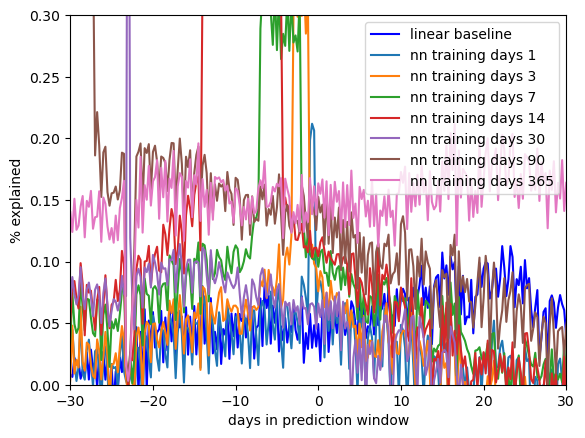

In [21]:
max_height=2

fig, ax = plt.subplots()
#ax.plot(np.mean((y_ts-y_pred_ts)**2,axis=1))
#ax.plot(np.mean((y_ts-y_pred_nn_ts)**2,axis=1))
ax.plot(ts-trainig_day,1-np.mean((y_pred_linear_ts-y_ts)**2,axis=1)/np.mean((y_ts)**2,axis=1),'b')
for i in range(training_lengths.size):
    ax.plot(ts-trainig_day,1-np.mean((y_pred_nn_ts[i]-y_ts)**2,axis=1)/np.mean((y_ts)**2,axis=1))
ax.set_ylim(0,0.3)
ax.set_xlim(-30,30)
plt.xlabel('days in prediction window')
plt.ylabel('% explained')
ax.legend(labels)



In [31]:
skill=np.zeros(training_lengths.size+1)
tmp = 1-np.mean((y_pred_linear_ts-y_ts)**2,axis=1)/np.mean((y_ts)**2,axis=1)
skill[0]=np.mean(tmp[np.where(ts==trainig_day)[0][0]:np.where(ts==trainig_day)[0][0]+14])

for i in range(training_lengths.size):
  tmp = 1-np.mean((y_pred_nn_ts[i]-y_ts)**2,axis=1)/np.mean((y_ts)**2,axis=1)
  skill[i+1]=np.mean(tmp[np.where(ts==trainig_day)[0][0]:np.where(ts==trainig_day)[0][0]+14])

display(skill)

array([0.04726705, 0.05592212, 0.07012581, 0.09306722, 0.10502612,
       0.05764109, 0.12870023, 0.14925119])

(0.0, 0.2)

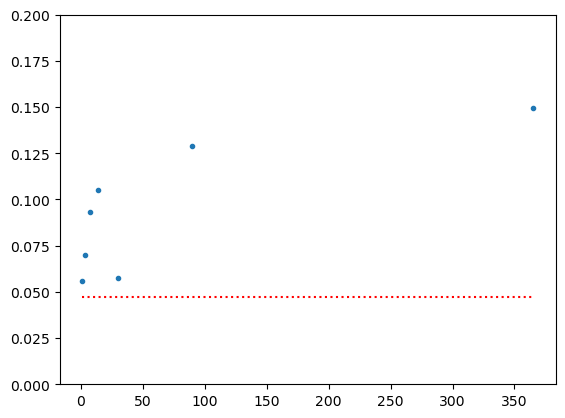

In [41]:
fig, ax = plt.subplots()
ax.plot(training_lengths, skill[1:],'.')
ax.plot(training_lengths[np.array([0, -1])], skill[0]*np.array([1, 1]),'r:')
ax.set_ylim(0,0.2)

In [42]:
display(1-np.mean((y_pred_ts-y_ts)**2)/np.mean((y_ts)**2))
display(1-np.mean((y_pred_nn_ts-y_ts)**2)/np.mean((y_ts)**2))

0.011444492704051568

0.23931151628494263